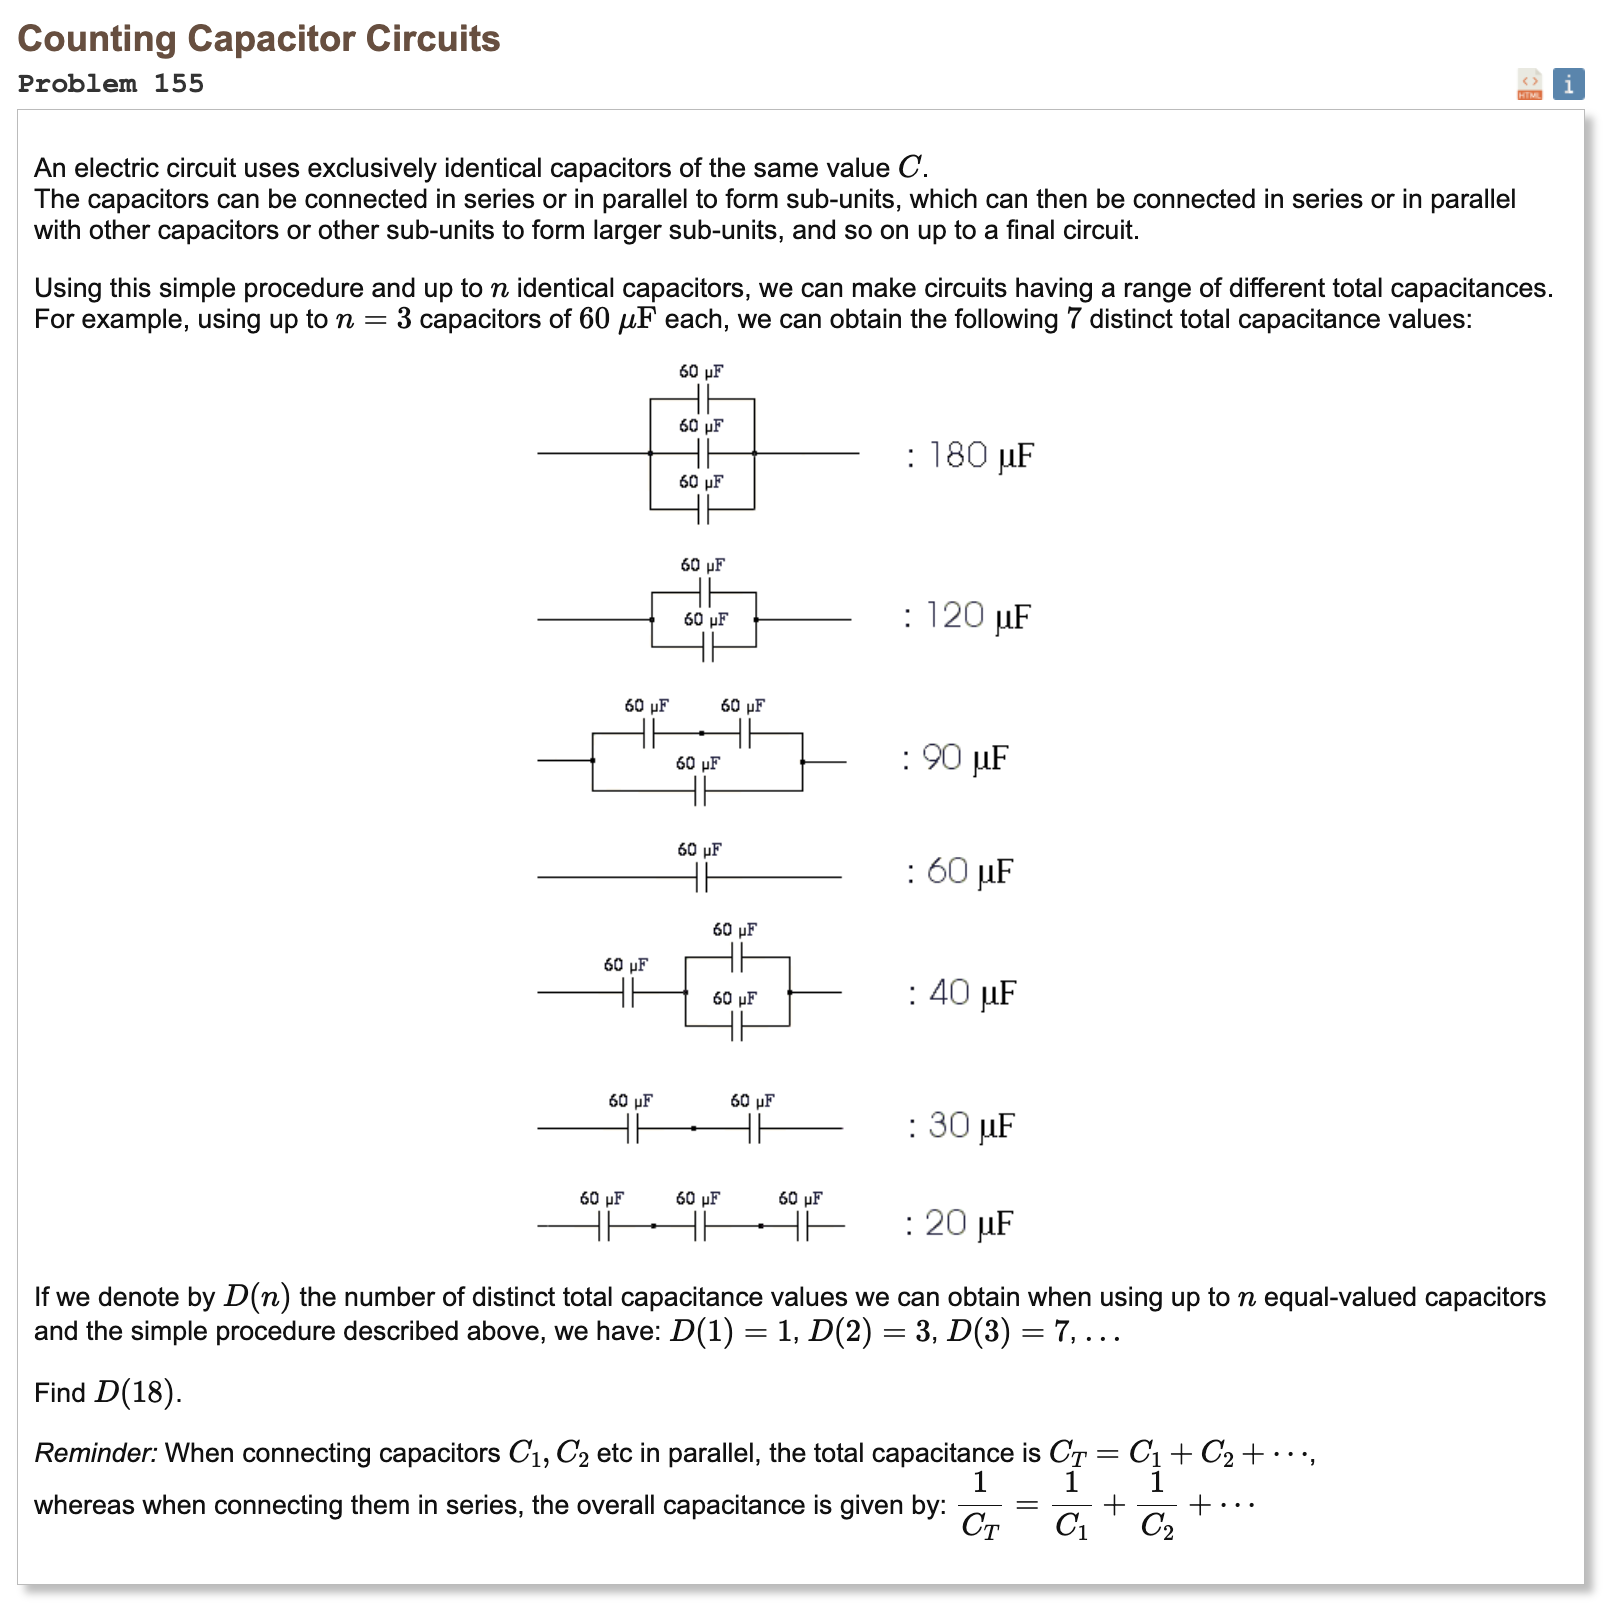

## Initial Approach

* we have many identical capacitors, each of unit value (say 1F)
* we can connect them in series or parallel in any grouping
* in parallel, capacitance adds normally: C = C1 + C2 + ...
* in series, capacitance adds reciprocally: 1/C = 1/C1 + 1/C2 + ...
* we can group capacitors and treat each group as a sub-unit, then combine sub-units recursively
* for a given n, we want to count how many distinct total capacitance values are possible using up to n capacitors
* the goal is to compute f(18) — the number of distinct capacitance values constructible using up to 18 capacitors

In [1]:
%%time

from fractions import Fraction

def count_capacitor_values(limit):
    dp = [set() for _ in range(limit + 1)]
    dp[1].add(Fraction(1))

    for n in range(2, limit + 1):
        results = set()
        for i in range(1, n // 2 + 1):
            j = n - i
            for a in dp[i]:
                for b in dp[j]:
                    results.add(a + b)
                    results.add(1 / (1 / a + 1 / b))
        dp[n] = results

    all_values = set()
    for i in range(1, limit + 1):
        all_values.update(dp[i])
    return len(all_values)

result = count_capacitor_values(18)
print("Result:", result)

Result: 3857447
CPU times: user 1min 9s, sys: 598 ms, total: 1min 9s
Wall time: 1min 10s
